<a href="https://colab.research.google.com/github/Shalinivelappan1/portfolio/blob/main/cvar_optimization2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [907]:
#pip install pandas-datareader

In [908]:
import pandas_datareader.data as web
import datetime

In [909]:
#pip install --upgrade pandas-datareader

In [910]:
#pip install pyportfolioopt

In [911]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import  risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [912]:
#start = datetime.datetime(2019,9,15)
#end = datetime.datetime(2021,9,15)

In [913]:
def get_stock(ticker):
    data = web.DataReader(f"{ticker}","yahoo",start,end)
    data[f'{ticker}'] = data["Close"]
    data = data[[f'{ticker}']] 
    print(data.head())
    return data 

In [914]:
from functools import reduce

def combine_stocks(tickers):
    data_frames = []
    for i in tickers:
        data_frames.append(get_stock(i))
        
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='outer'), data_frames)
    print(df_merged.head())
    return df_merged


In [915]:
import yfinance as yf
from pandas_datareader import data as pdr #import pandas datareader

In [916]:
yf.pdr_override()

In [917]:
#data = pdr.get_data_yahoo("TSLA", start="2022-12-01", end="2023-02-08")

In [918]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
#y_symbols = ['ES=F','^GSPC', '^DJI', '^FTSE', 'MSCI','JPGB','EMB','EMX','FM','HGGB.TO', 'BTC-USD','BTC=F', 'ETH-USD','XRP-USD', 'DGX-USD','USDT-USD','LTC-USD','XLM-USD','^CMC200','BITW', '^TNX','^FVX','^IRX','^NYICDX', 'EURUSD=X','GBPUSD=X','JPY=X','CAD=X','AUDUSD=X', 'GC=F','CL=F', 'GD=F', 'BZ=F', 'SI=F','HG=F','KC=F', '^CMC200',   ]
y_symbols = ['ES=F','^GSPC', '^DJI', '^FTSE', 'MSCI','JPGB','EMB','EMX','FM','HGGB.TO', 'BTC-USD','BTC=F', 'ETH-USD','XRP-USD', 'DGX-USD','LTC-USD','XLM-USD','^CMC200','BITW','^NYICDX', 'EURUSD=X','GBPUSD=X', 'GC=F','CL=F', 'GD=F', 'BZ=F', 'SI=F','HG=F','KC=F', '^CMC200',   ]
#y_symbols = [ '^FTSE', 'MSCI','JPGB','HGGB.TO', 'BTC-USD','BTC=F', 'ETH-USD','XRP-USD', 'DGX-USD','LTC-USD','XLM-USD','BITW', 'EURUSD=X','GBPUSD=X', 'GC=F','CL=F', 'GD=F', 'BZ=F', 'SI=F','HG=F','KC=F'  ]

from datetime import datetime
startdate = datetime(2018,1,1)
enddate = datetime(2022,12,30)
#data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)['Adj Close']
data = yf.download(y_symbols,startdate, enddate)['Adj Close']



[*********************100%***********************]  29 of 29 completed


In [919]:
data = data.dropna()


In [920]:
data.to_csv("data.csv", index=False)

In [921]:
portfolio = pd.read_csv("data.csv")


In [922]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage


mu = mean_historical_return(portfolio)
S = CovarianceShrinkage(portfolio).ledoit_wolf()

In [923]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

{'BITW': 0.0, 'BTC-USD': 0.0, 'BTC=F': 0.0, 'BZ=F': 0.24997, 'CL=F': 0.20214, 'DGX-USD': 0.0, 'EMB': 0.0, 'EMX': 0.0, 'ES=F': 0.0, 'ETH-USD': 0.0, 'EURUSD=X': 0.0, 'FM': 0.0, 'GBPUSD=X': 0.0, 'GC=F': 0.0, 'GD=F': 0.19259, 'HG=F': 0.0, 'HGGB.TO': 0.0, 'JPGB': 0.0, 'KC=F': 0.03894, 'LTC-USD': 0.0, 'MSCI': 0.00831, 'SI=F': 0.0, 'XLM-USD': 0.0, 'XRP-USD': 0.0, '^CMC200': 0.0, '^DJI': 0.0, '^FTSE': 0.05839, '^GSPC': 0.0, '^NYICDX': 0.24966}


In [924]:
data.to_excel('data_file1822.xlsx')
mu.to_excel('mean_returns1822.xlsx')
S.to_excel('var_covariance1822.xlsx')


In [925]:
cleaned_weights

OrderedDict([('BITW', 0.0),
             ('BTC-USD', 0.0),
             ('BTC=F', 0.0),
             ('BZ=F', 0.24997),
             ('CL=F', 0.20214),
             ('DGX-USD', 0.0),
             ('EMB', 0.0),
             ('EMX', 0.0),
             ('ES=F', 0.0),
             ('ETH-USD', 0.0),
             ('EURUSD=X', 0.0),
             ('FM', 0.0),
             ('GBPUSD=X', 0.0),
             ('GC=F', 0.0),
             ('GD=F', 0.19259),
             ('HG=F', 0.0),
             ('HGGB.TO', 0.0),
             ('JPGB', 0.0),
             ('KC=F', 0.03894),
             ('LTC-USD', 0.0),
             ('MSCI', 0.00831),
             ('SI=F', 0.0),
             ('XLM-USD', 0.0),
             ('XRP-USD', 0.0),
             ('^CMC200', 0.0),
             ('^DJI', 0.0),
             ('^FTSE', 0.05839),
             ('^GSPC', 0.0),
             ('^NYICDX', 0.24966)])

In [926]:

# convert into dataframe
df = pd.DataFrame(data=cleaned_weights, index=[1])

#convert into excel
df.to_excel("cleaned_weights_mpt1822.xlsx", index=False)
print("Dictionary converted into excel...")

Dictionary converted into excel...


Portfolio Allocation


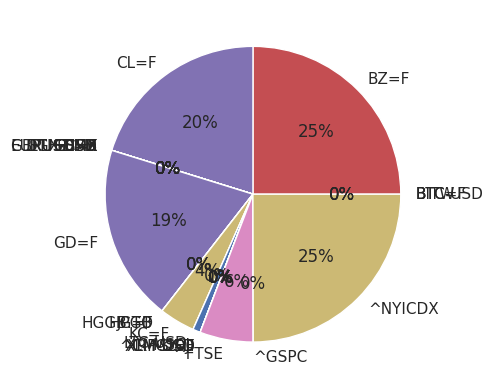

In [927]:
cleaned_weights = ef.clean_weights() #to clean the raw weights
# Get the Keys and store them in a list
labels = list(cleaned_weights.keys())
# Get the Values and store them in a list
values = list(cleaned_weights.values())
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.0f%%')
print('Portfolio Allocation')
plt.show(fig)

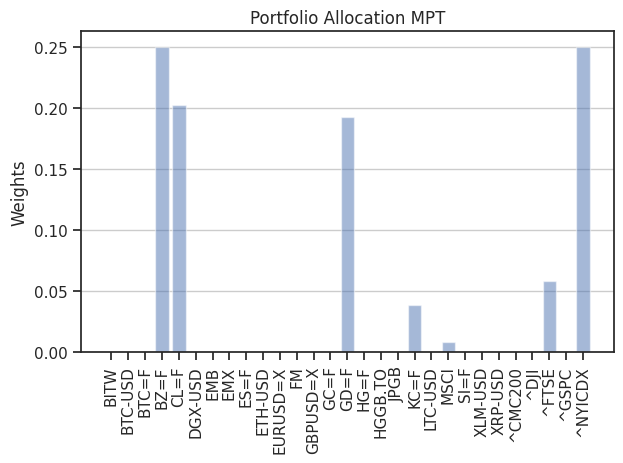

In [928]:
x_pos = np.arange(len(labels))
CTEs = values

# Build the plot
fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Weights')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Portfolio Allocation MPT')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()

In [929]:
ef.portfolio_performance(verbose=True)

Expected annual return: 10.0%
Annual volatility: 41.5%
Sharpe Ratio: 0.19


(0.10005811434150004, 0.41534944980533944, 0.19274881519409892)

In [930]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'BZ=F': 303, '^NYICDX': 240, 'CL=F': 257, 'GD=F': 31, 'KC=F': 22, 'MSCI': 2}
Funds remaining: $6610.21


In [931]:
from pypfopt import HRPOpt

In [932]:
returns = portfolio.pct_change().dropna()

In [933]:
hrp = HRPOpt(returns)
hrp_weights = hrp.optimize()

In [934]:
hrp.portfolio_performance(verbose=True)
print(dict(hrp_weights))

Expected annual return: -6.2%
Annual volatility: 3.2%
Sharpe Ratio: -2.58
{'BITW': 0.0004082892776178415, 'BTC-USD': 0.0003056440607208355, 'BTC=F': 0.00027982686302802134, 'BZ=F': 0.0006830670228921579, 'CL=F': 0.0006263601817171154, 'DGX-USD': 3.744784320998261e-05, 'EMB': 0.009236415646764598, 'EMX': 0.0012614470268486177, 'ES=F': 0.0025001464782115706, 'ETH-USD': 0.00018523788599893125, 'EURUSD=X': 0.12149581013146969, 'FM': 0.015521935855275072, 'GBPUSD=X': 0.06155884862190089, 'GC=F': 0.009230274336773403, 'GD=F': 0.002050827449762383, 'HG=F': 0.0020908279417477522, 'HGGB.TO': 0.4301406494945395, 'JPGB': 0.1584805620535101, 'KC=F': 0.0050428538908939315, 'LTC-USD': 0.00017727455912569683, 'MSCI': 0.0011359898150568098, 'SI=F': 0.002290840746946715, 'XLM-USD': 0.00023179471660924022, 'XRP-USD': 0.00019378699785629628, '^CMC200': 0.0007856317922872015, '^DJI': 0.0034911221399882143, '^FTSE': 0.03157040121646059, '^GSPC': 0.006283584212695443, '^NYICDX': 0.13270310174009137}


In [935]:
# convert into dataframe
df = pd.DataFrame(data=hrp_weights, index=[1])

#convert into excel
df.to_excel("cleaned_weights_hrp1822.xlsx", index=False)
print("Dictionary converted into excel...")

Dictionary converted into excel...


Portfolio Allocation


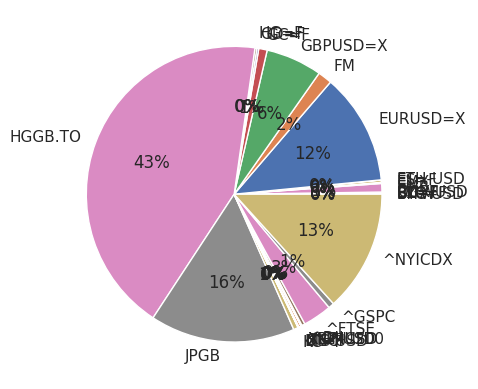

In [936]:
cleaned_weights = hrp_weights #to clean the raw weights
# Get the Keys and store them in a list
labels = list(cleaned_weights.keys())
# Get the Values and store them in a list
values = list(cleaned_weights.values())
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.0f%%')
print('Portfolio Allocation')
plt.show(fig)

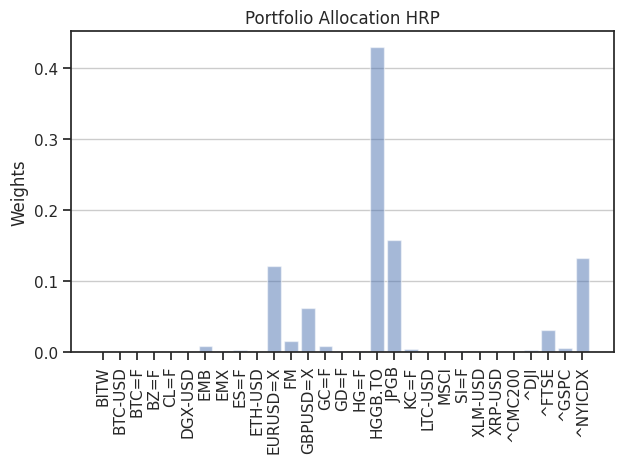

In [937]:
x_pos = np.arange(len(labels))
CTEs = values

# Build the plot
fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Weights')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Portfolio Allocation HRP')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()

In [938]:
da_hrp = DiscreteAllocation(hrp_weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da_hrp.greedy_portfolio()
print("Discrete allocation (HRP):", allocation)
print("Funds remaining (HRP): ${:.2f}".format(leftover))

Discrete allocation (HRP): {'HGGB.TO': 1997, 'JPGB': 343, '^NYICDX': 127, 'EURUSD=X': 11430, 'GBPUSD=X': 5117, 'FM': 60, 'EMB': 11, 'GC=F': 1, '^GSPC': 1, 'KC=F': 2, 'SI=F': 9, 'HG=F': 54, 'GD=F': 1, 'EMX': 68, 'BITW': 7, 'XLM-USD': 321, 'XRP-USD': 56}
Funds remaining (HRP): $3.49


In [939]:
from pypfopt.efficient_frontier import EfficientCVaR

In [940]:
S = portfolio.cov()
ef_cvar = EfficientCVaR(mu, S)
cvar_weights = ef_cvar.min_cvar()

cleaned_weights = ef_cvar.clean_weights()
print(dict(cleaned_weights))

{'BITW': 0.21368, 'BTC-USD': 0.0, 'BTC=F': 0.0, 'BZ=F': 0.0, 'CL=F': 0.0, 'DGX-USD': 0.15865, 'EMB': 0.0, 'EMX': 0.0, 'ES=F': 0.0, 'ETH-USD': 0.0, 'EURUSD=X': 0.0, 'FM': 0.0, 'GBPUSD=X': 0.0, 'GC=F': 0.0, 'GD=F': 0.01871, 'HG=F': 0.0, 'HGGB.TO': 0.0, 'JPGB': 0.0, 'KC=F': 0.0, 'LTC-USD': 0.0, 'MSCI': 0.0, 'SI=F': 0.0, 'XLM-USD': 0.0, 'XRP-USD': 0.0, '^CMC200': 0.0, '^DJI': 0.0, '^FTSE': 0.00256, '^GSPC': 0.0, '^NYICDX': 0.6064}


In [941]:
# convert into dataframe
df = pd.DataFrame(data=cvar_weights, index=[1])

#convert into excel
df.to_excel("cleaned_weights_cvar1822.xlsx", index=False)
print("Dictionary converted into excel...")

Dictionary converted into excel...


Portfolio Allocation


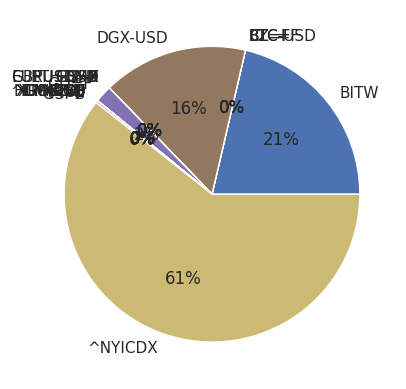

In [942]:
cleaned_weights = ef_cvar.clean_weights() #to clean the raw weights
# Get the Keys and store them in a list
labels = list(cleaned_weights.keys())
# Get the Values and store them in a list
values = list(cleaned_weights.values())
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.0f%%')
print('Portfolio Allocation')
plt.show(fig)

In [943]:
ef_cvar.portfolio_performance(verbose=True)
print(dict(cvar_weights))

Expected annual return: -12.9%
Conditional Value at Risk: -0.17%
{'BITW': 0.2136820497063861, 'BTC-USD': 7.283e-13, 'BTC=F': 7.023e-13, 'BZ=F': 3.2660933e-09, 'CL=F': 7.233292e-09, 'DGX-USD': 0.1586541833188157, 'EMB': 1.522845e-09, 'EMX': 2.6072148e-09, 'ES=F': 2.96236e-11, 'ETH-USD': 6.3036e-12, 'EURUSD=X': 2.4074622e-09, 'FM': 2.0214323e-09, 'GBPUSD=X': 2.4256041e-09, 'GC=F': 7.48286e-11, 'GD=F': 0.0187053577953617, 'HG=F': 2.3046107e-09, 'HGGB.TO': 2.8418903e-09, 'JPGB': 2.9655481e-09, 'KC=F': 3.212754e-10, 'LTC-USD': 5.206494e-10, 'MSCI': 7.7584e-11, 'SI=F': 1.8796129e-09, 'XLM-USD': 2.3833367e-09, 'XRP-USD': 2.3133038e-09, '^CMC200': 2.80368e-11, '^DJI': 5.659e-12, '^FTSE': 0.0025629383883995, '^GSPC': 3.00966e-11, '^NYICDX': 0.6063954335233033}


In [944]:
hrp_weights

OrderedDict([('BITW', 0.0004082892776178415),
             ('BTC-USD', 0.0003056440607208355),
             ('BTC=F', 0.00027982686302802134),
             ('BZ=F', 0.0006830670228921579),
             ('CL=F', 0.0006263601817171154),
             ('DGX-USD', 3.744784320998261e-05),
             ('EMB', 0.009236415646764598),
             ('EMX', 0.0012614470268486177),
             ('ES=F', 0.0025001464782115706),
             ('ETH-USD', 0.00018523788599893125),
             ('EURUSD=X', 0.12149581013146969),
             ('FM', 0.015521935855275072),
             ('GBPUSD=X', 0.06155884862190089),
             ('GC=F', 0.009230274336773403),
             ('GD=F', 0.002050827449762383),
             ('HG=F', 0.0020908279417477522),
             ('HGGB.TO', 0.4301406494945395),
             ('JPGB', 0.1584805620535101),
             ('KC=F', 0.0050428538908939315),
             ('LTC-USD', 0.00017727455912569683),
             ('MSCI', 0.0011359898150568098),
             ('SI=F', 0.0

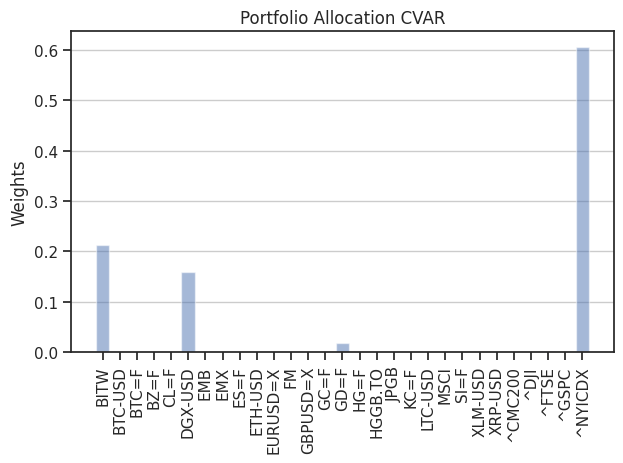

In [945]:
x_pos = np.arange(len(labels))
CTEs = values

# Build the plot
fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Weights')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Portfolio Allocation CVAR')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()

In [946]:
da_cvar = DiscreteAllocation(cvar_weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da_cvar.greedy_portfolio()
print("Discrete allocation (CVAR):", allocation)
print("Funds remaining (CVAR): ${:.2f}".format(leftover))

Discrete allocation (CVAR): {'^NYICDX': 584, 'BITW': 4149, 'DGX-USD': 360, 'GD=F': 3, 'CL=F': 1, 'BZ=F': 1, 'JPGB': 1, 'HGGB.TO': 1, 'EMX': 1, 'GBPUSD=X': 1, 'EURUSD=X': 1, 'XLM-USD': 1, 'XRP-USD': 1, 'HG=F': 1, 'FM': 1, 'SI=F': 1}
Funds remaining (CVAR): $5.16


In [947]:
mu

BITW       -0.816902
BTC-USD    -0.417987
BTC=F      -0.411707
BZ=F        0.120916
CL=F        0.105482
DGX-USD    -0.122991
EMB        -0.129282
EMX        -0.351078
ES=F       -0.053971
ETH-USD    -0.415693
EURUSD=X   -0.091739
FM         -0.119170
GBPUSD=X   -0.108580
GC=F       -0.030224
GD=F        0.095378
HG=F       -0.127354
HGGB.TO    -0.097265
JPGB       -0.071386
KC=F        0.037939
LTC-USD    -0.498696
MSCI        0.023760
SI=F       -0.100004
XLM-USD    -0.699896
XRP-USD    -0.523141
^CMC200    -0.468948
^DJI       -0.026995
^FTSE       0.041408
^GSPC      -0.058277
^NYICDX     0.104339
dtype: float64

In [948]:
S

,BITW,BTC-USD,BTC=F,BZ=F,CL=F,DGX-USD,EMB,EMX,ES=F,ETH-USD,EURUSD=X,FM,GBPUSD=X,GC=F,GD=F,HG=F,HGGB.TO,JPGB,KC=F,LTC-USD,MSCI,SI=F,XLM-USD,XRP-USD,^CMC200,^DJI,^FTSE,^GSPC,^NYICDX
BITW,273.062487,2.073123e+05,2.086165e+05,-132.937318,-112.041524,163.726923,147.505074,6.261754,4.185247e+03,1.506887e+04,1.036290,52.338136,1.322584,445.783338,-748.603134,5.186285,22.880255,39.666341,-3.525714,836.420439,1042.346766,26.407650,1.587468,4.387011,5.444813e+03,2.258953e+04,-751.466974,4.264704e+03,-99.419663
BTC-USD,207312.316075,1.917907e+08,1.929416e+08,-68616.567617,-51391.914033,104488.878651,110103.770457,4177.216735,3.719813e+06,1.399391e+07,742.065505,45488.002184,1001.263139,454279.322629,-381372.420987,4554.496675,16847.086194,29651.407271,85440.082939,688082.372497,854059.146368,19608.383596,1238.933208,3638.452871,4.880731e+06,1.901478e+07,-69300.728894,3.790431e+06,-73932.048741
BTC=F,208616.543610,1.929416e+08,1.944429e+08,-69296.991745,-51979.905257,104633.721262,110653.343611,4187.481091,3.742725e+06,1.409294e+07,744.481009,45739.140817,1004.669114,452342.600512,-385024.387395,4566.892570,16924.487823,29789.699380,86925.681338,692414.307401,860542.948338,19586.449289,1246.183622,3658.837904,4.915048e+06,1.911869e+07,-70540.621794,3.813601e+06,-74195.178822
BZ=F,-132.937318,-6.861657e+04,-6.929699e+04,213.568879,206.488998,-165.970535,-89.656037,-3.651925,-1.816916e+03,-5.653931e+03,-0.566879,-17.909826,-0.592071,332.143926,1186.300463,-0.478197,-12.678635,-23.195815,184.230949,-465.171710,-806.632325,-9.621622,-0.830307,-2.092520,-2.159536e+03,-1.337921e+04,1089.754914,-1.825584e+03,49.125465
CL=F,-112.041524,-5.139191e+04,-5.197991e+04,206.488998,204.088488,-153.831731,-76.628477,-3.132406,-1.488128e+03,-4.517747e+03,-0.467809,-12.897583,-0.462470,401.703324,1155.067614,0.106201,-10.672257,-19.758142,188.495558,-401.362866,-742.708346,-6.716563,-0.710487,-1.798618,-1.730158e+03,-1.154262e+04,1093.077379,-1.487656e+03,39.485745
DGX-USD,163.726923,1.044889e+05,1.046337e+05,-165.970535,-153.831731,308.113276,101.079349,4.338895,2.434411e+03,7.441536e+03,0.744690,26.475296,0.872436,59.491503,-934.825828,2.753741,14.293204,27.282666,-199.355045,551.287664,799.654473,20.965417,1.013455,2.797868,2.872633e+03,1.829187e+04,-846.276283,2.464831e+03,-67.220979
EMB,147.505074,1.101038e+05,1.106533e+05,-89.656037,-76.628477,101.079349,91.538002,3.575054,2.543397e+03,7.967210e+03,0.635804,30.792345,0.810010,259.373443,-503.201288,2.960258,13.844739,24.335089,-16.435257,460.690512,644.130148,15.958129,0.853083,2.274642,2.906390e+03,1.454765e+04,-237.450569,2.592783e+03,-61.173853
EMX,6.261754,4.177217e+03,4.187481e+03,-3.651925,-3.132406,4.338895,3.575054,0.187063,8.497523e+01,2.825582e+02,0.026732,1.106623,0.032701,10.890547,-20.815799,0.114259,0.564458,0.963436,-3.543814,19.161163,23.997460,0.763935,0.037256,0.095153,1.114927e+02,5.079208e+02,-30.285720,8.673730e+01,-2.494111
ES=F,4185.246998,3.719813e+06,3.742725e+06,-1816.916481,-1488.127653,2434.411456,2543.397194,84.975230,9.403920e+04,2.867842e+05,16.487731,1005.001125,22.846687,11096.178532,-9982.742512,99.416623,377.232712,680.060098,1861.192540,13715.049620,19834.271590,445.391070,24.017931,68.837580,9.628456e+04,5.110486e+05,12976.284564,9.568118e+04,-1671.199693
ETH-USD,15068.868963,1.399391e+07,1.409294e+07,-5653.930561,-4517.747125,7441.535574,7967.210112,282.558176,2.867842e+05,1.075596e+06,51.486004,3311.970448,69.971821,31527.508635,-30580.003490,321.428675,1198.569849,2135.507717,7568.075307,50624.791863,64405.965541,1333.085819,89.246135,265.853306,3.614715e+05,1.463547e+06,8830.731061,2.916403e+05,-5174.530971


In [949]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import  risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [950]:
mean = expected_returns.mean_historical_return(portfolio)
S = risk_models.sample_cov(portfolio) # for sample covariance matrix

Covariance between daily simple returns of stocks in your portfolio


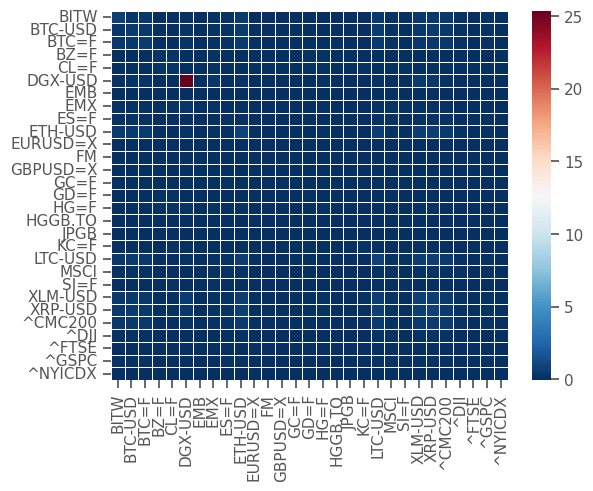

In [951]:
plt.style.use('ggplot')
fig = plt.figure()
sb.heatmap(S,xticklabels=S.columns, yticklabels=S.columns,
cmap='RdBu_r', annot=False, linewidth=0.5)
print('Covariance between daily simple returns of stocks in your portfolio')
plt.show(fig)

In [952]:
correlation_matrix = portfolio.corr(method='pearson')
correlation_matrix


,BITW,BTC-USD,BTC=F,BZ=F,CL=F,DGX-USD,EMB,EMX,ES=F,ETH-USD,EURUSD=X,FM,GBPUSD=X,GC=F,GD=F,HG=F,HGGB.TO,JPGB,KC=F,LTC-USD,MSCI,SI=F,XLM-USD,XRP-USD,^CMC200,^DJI,^FTSE,^GSPC,^NYICDX
BITW,1.000000,0.905900,0.905361,-0.550487,-0.474612,0.564461,0.932986,0.876135,0.825915,0.879276,0.906773,0.894218,0.898121,0.345220,-0.549322,0.731756,0.940622,0.937003,-0.007751,0.943834,0.797811,0.672344,0.976092,0.936258,0.928814,0.760505,-0.225236,0.826991,-0.909655
BTC-USD,0.905900,1.000000,0.999116,-0.339036,-0.259760,0.429834,0.830975,0.697396,0.875897,0.974318,0.774777,0.927341,0.811292,0.419771,-0.333920,0.766774,0.826411,0.835760,0.224113,0.926464,0.779997,0.595691,0.908973,0.926533,0.993455,0.763842,-0.024785,0.877036,-0.807150
BTC=F,0.905361,0.999116,1.000000,-0.340055,-0.260934,0.427485,0.829407,0.694325,0.875261,0.974498,0.771979,0.926079,0.808481,0.415121,-0.334810,0.763600,0.824527,0.833912,0.226450,0.925917,0.780540,0.590952,0.908035,0.925348,0.993593,0.762760,-0.025055,0.876359,-0.804479
BZ=F,-0.550487,-0.339036,-0.340055,1.000000,0.989051,-0.647004,-0.641224,-0.577775,-0.405426,-0.373041,-0.560879,-0.346002,-0.454619,0.290844,0.984311,-0.076292,-0.589371,-0.619570,0.457945,-0.593535,-0.698112,-0.276995,-0.577280,-0.504962,-0.416551,-0.509316,0.369333,-0.400291,0.508245
CL=F,-0.474612,-0.259760,-0.260934,0.989051,1.000000,-0.613453,-0.560635,-0.506961,-0.339685,-0.304922,-0.473487,-0.254891,-0.363259,0.359832,0.980403,0.017333,-0.507496,-0.539867,0.479304,-0.523878,-0.657548,-0.197802,-0.505317,-0.444005,-0.341392,-0.449491,0.378965,-0.333685,0.417894
DGX-USD,0.564461,0.429834,0.427485,-0.647004,-0.613453,1.000000,0.601875,0.571518,0.452256,0.408774,0.613435,0.425835,0.557726,0.043371,-0.645776,0.365771,0.553171,0.606711,-0.412564,0.585632,0.576190,0.502506,0.586632,0.562121,0.461320,0.579734,-0.238789,0.449961,-0.579008
EMB,0.932986,0.830975,0.829407,-0.641224,-0.560635,0.601875,1.000000,0.863948,0.866880,0.802936,0.960883,0.908653,0.950019,0.346919,-0.637746,0.721389,0.983036,0.992847,-0.062402,0.897864,0.851514,0.701736,0.905957,0.838437,0.856308,0.845898,-0.122922,0.868377,-0.966719
EMX,0.876135,0.697396,0.694325,-0.577775,-0.506961,0.571518,0.863948,1.000000,0.640684,0.629926,0.893694,0.722373,0.848427,0.322225,-0.583587,0.615937,0.886591,0.869519,-0.297643,0.826094,0.701762,0.743114,0.875225,0.775863,0.726657,0.653323,-0.346818,0.642620,-0.871880
ES=F,0.825915,0.875897,0.875261,-0.405426,-0.339685,0.452256,0.866880,0.640684,1.000000,0.901729,0.777418,0.925270,0.836010,0.463044,-0.394732,0.755867,0.835680,0.865651,0.220473,0.833959,0.818051,0.611054,0.795789,0.791643,0.885073,0.927115,0.209582,0.999804,-0.823966
ETH-USD,0.879276,0.974318,0.974498,-0.373041,-0.304922,0.408774,0.802936,0.629926,0.901729,1.000000,0.717815,0.901609,0.757079,0.389017,-0.357536,0.722605,0.785098,0.803761,0.265082,0.910208,0.785453,0.540787,0.874343,0.904015,0.982486,0.785069,0.042173,0.901085,-0.754365


Correlation between Stocks in your portfolio


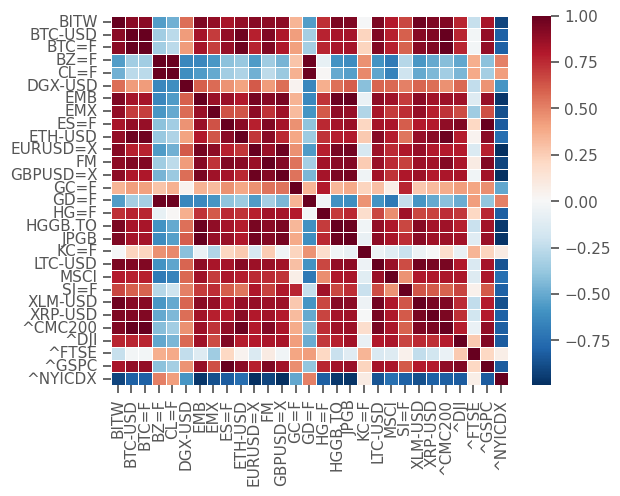

In [953]:
fig1 = plt.figure()
sb.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='RdBu_r', annot=False, linewidth=0.5)
print('Correlation between Stocks in your portfolio')
plt.show(fig1)

In [954]:
daily_simple_return = portfolio.pct_change(1)
daily_simple_return.dropna(inplace=True)
daily_simple_return

,BITW,BTC-USD,BTC=F,BZ=F,CL=F,DGX-USD,EMB,EMX,ES=F,ETH-USD,EURUSD=X,FM,GBPUSD=X,GC=F,GD=F,HG=F,HGGB.TO,JPGB,KC=F,LTC-USD,MSCI,SI=F,XLM-USD,XRP-USD,^CMC200,^DJI,^FTSE,^GSPC,^NYICDX
1,0.018714,0.024268,0.056960,0.024702,0.016391,-0.069361,0.001522,-0.002890,0.001846,0.027570,-0.001234,0.005561,-0.004898,0.002417,0.004257,-0.013299,-0.001560,-0.000193,0.000621,0.023408,0.014936,0.003668,0.003112,0.013253,0.037065,0.000725,0.003884,0.001447,0.000779
2,-0.011182,0.043475,0.017744,-0.000561,-0.000291,0.373844,-0.004919,0.002899,-0.003566,0.055061,-0.000647,0.000307,0.001049,-0.019030,-0.008008,-0.027935,-0.000617,0.000682,-0.022029,0.031091,-0.014695,-0.025758,0.015114,0.020423,0.035245,-0.000675,-0.006134,-0.003629,0.006674
3,0.009693,-0.059027,-0.045460,0.008134,0.011772,-0.211513,0.006651,-0.008671,0.008828,-0.058467,-0.006295,0.010749,-0.004374,0.009940,0.012441,0.014760,0.002293,-0.000292,0.025698,-0.073616,0.009481,0.015259,-0.094756,-0.071868,-0.042735,0.005187,0.000651,0.008834,-0.003978
4,-0.032000,-0.090358,-0.035449,-0.005564,-0.005602,-0.069951,-0.002232,-0.005831,-0.000650,-0.036430,0.002918,-0.003039,0.003853,0.003704,-0.003189,-0.000551,-0.000384,0.000779,-0.009279,-0.095818,-0.004267,0.004376,-0.100787,-0.112391,-0.076775,-0.003630,0.001160,-0.000797,-0.002108
5,-0.107107,-0.002624,-0.076729,0.010211,0.011845,0.203293,0.003937,-0.023460,0.000059,-0.028115,0.002073,-0.003353,0.000865,-0.002425,0.007246,0.006174,0.000984,0.001556,-0.015298,-0.003535,-0.002154,-0.010214,0.012521,0.016992,-0.016389,-0.000878,0.002529,0.000175,0.001445
6,-0.032766,0.115691,0.105287,0.000000,-0.001285,0.041006,0.003565,-0.024024,-0.001716,0.036080,-0.001704,-0.001223,-0.001882,0.000528,-0.000374,-0.005808,0.002598,-0.000291,-0.003171,0.068116,0.005309,0.009742,0.039148,0.050521,0.051394,-0.004413,-0.001987,-0.001824,0.000444
7,-0.196172,-0.000287,0.026117,0.006508,0.013579,-0.090599,0.002664,0.006154,0.006460,-0.097574,-0.000024,0.013366,0.001431,-0.008346,0.003458,0.001102,0.000391,0.004760,0.001590,-0.053783,0.029367,0.005217,-0.125257,-0.077806,-0.027444,0.000942,0.007499,0.006610,0.004882
8,0.000000,0.077250,0.063898,0.002339,-0.000423,0.012001,-0.006023,-0.003058,0.002120,0.078224,-0.005123,0.004295,-0.003586,-0.007138,-0.003912,-0.002092,-0.000996,-0.001354,-0.021277,0.061816,0.023461,-0.003804,0.093017,0.052386,0.087612,-0.002490,0.001766,0.001815,-0.000442
9,0.095000,0.004669,0.007177,0.015509,0.017494,-0.014057,0.002228,-0.030675,-0.001939,0.028782,0.000994,-0.000306,-0.000663,-0.005097,0.003104,-0.042365,0.000112,0.001931,-0.018819,0.033017,0.008640,-0.012311,-0.012885,-0.003468,-0.006814,-0.002745,0.003610,-0.002012,0.000221
10,-0.180039,-0.161094,-0.167771,0.029463,0.042152,0.107349,0.000045,-0.018987,0.022666,-0.176525,-0.022768,0.018943,-0.024836,-0.038771,0.009675,-0.013364,0.005070,-0.005464,0.008929,-0.233493,0.094768,-0.043282,-0.233810,-0.261898,-0.179405,0.014199,-0.006860,0.024902,0.018666


Daily simple returns


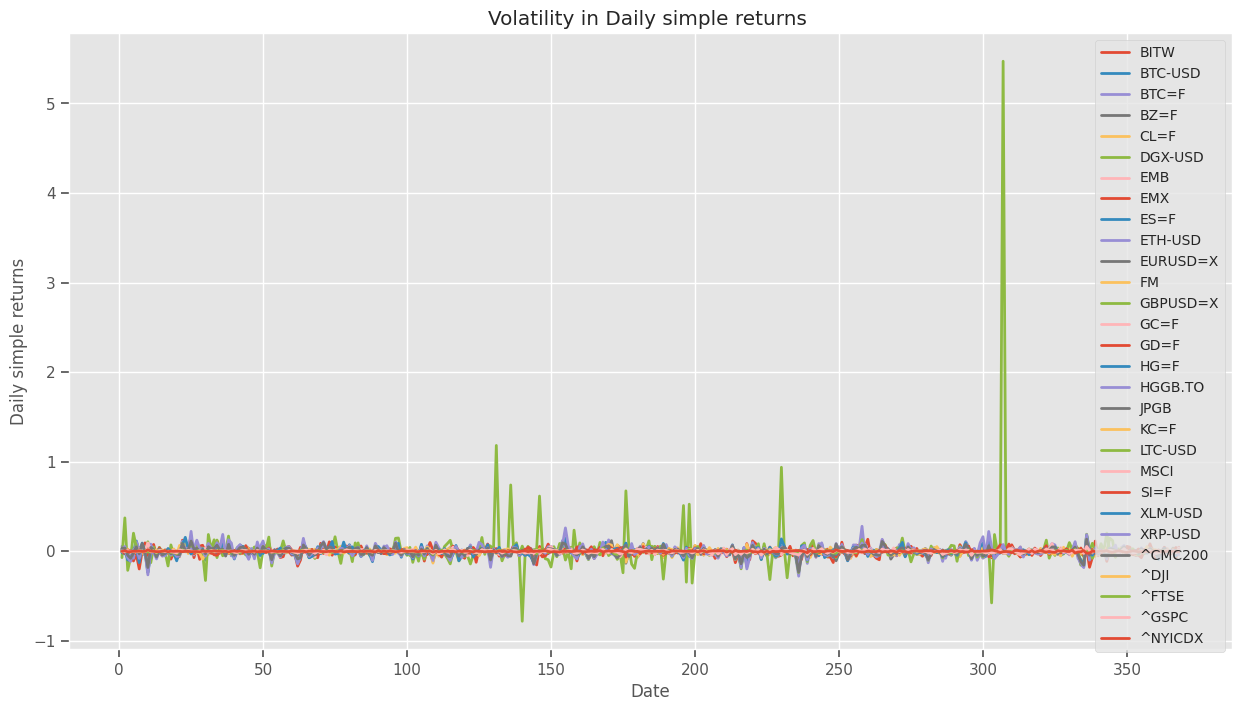

In [955]:
print('Daily simple returns')
fig, ax = plt.subplots(figsize=(15,8))


for i in daily_simple_return.columns.values :
    ax.plot(daily_simple_return[i], lw =2 ,label = i)


ax.legend( loc = 'upper right' , fontsize =10)
ax.set_title('Volatility in Daily simple returns ')
ax.set_xlabel('Date')
ax.set_ylabel('Daily simple returns')
plt.show(fig)

In [956]:
print('Average Daily returns(%) of stocks in your portfolio')
Avg_daily = daily_simple_return.mean()
print(Avg_daily*100)

Average Daily returns(%) of stocks in your portfolio
BITW       -0.527888
BTC-USD    -0.124302
BTC=F      -0.113346
BZ=F        0.082418
CL=F        0.080259
DGX-USD     1.870246
EMB        -0.051503
EMX        -0.126476
ES=F       -0.013054
ETH-USD    -0.060362
EURUSD=X   -0.036627
FM         -0.046396
GBPUSD=X   -0.043171
GC=F       -0.007603
GD=F        0.051907
HG=F       -0.038637
HGGB.TO    -0.040265
JPGB       -0.028999
KC=F        0.044156
LTC-USD    -0.113485
MSCI        0.037096
SI=F       -0.023462
XLM-USD    -0.339109
XRP-USD    -0.130693
^CMC200    -0.154807
^DJI       -0.004443
^FTSE       0.020640
^GSPC      -0.014794
^NYICDX     0.040814
dtype: float64


<Axes: title={'center': 'Risk Box Plot'}>

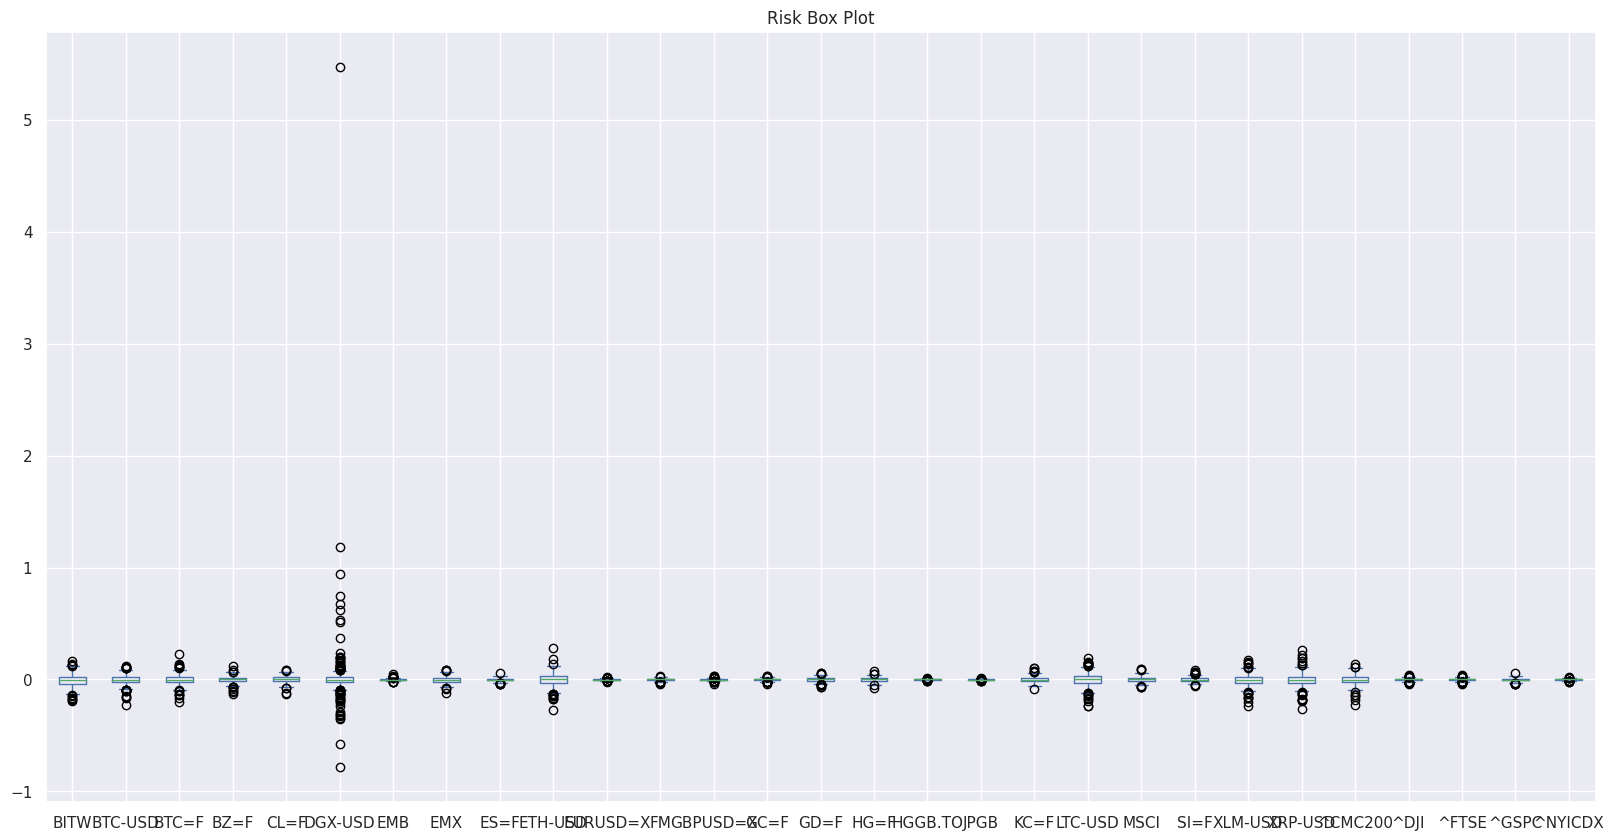

In [986]:
daily_simple_return.plot(kind = "box",figsize = (20,10), title = "Risk Box Plot")


In [958]:
print('Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.')
print(daily_simple_return.std() * np.sqrt(252) * 100)


Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.
BITW         84.447436
BTC-USD      66.758925
BTC=F        69.770625
BZ=F         43.057109
CL=F         44.963950
DGX-USD     503.808509
EMB          13.157728
EMX          47.653027
ES=F         21.266879
ETH-USD      87.003131
EURUSD=X      8.845008
FM           14.099671
GBPUSD=X     11.071801
GC=F         15.195474
GD=F         28.155725
HG=F         27.885095
HGGB.TO       4.098312
JPGB          4.412593
KC=F         38.683461
LTC-USD      88.935793
MSCI         37.518496
SI=F         30.501705
XLM-USD      82.467004
XRP-USD      90.192342
^CMC200      68.787215
^DJI         17.997160
^FTSE        15.127604
^GSPC        21.351150
^NYICDX       8.476820
dtype: float64


In [959]:
Avg_daily / (daily_simple_return.std() * np.sqrt(252)) *100

BITW       -0.625109
BTC-USD    -0.186195
BTC=F      -0.162455
BZ=F        0.191416
CL=F        0.178495
DGX-USD     0.371222
EMB        -0.391426
EMX        -0.265411
ES=F       -0.061380
ETH-USD    -0.069379
EURUSD=X   -0.414103
FM         -0.329055
GBPUSD=X   -0.389918
GC=F       -0.050037
GD=F        0.184357
HG=F       -0.138556
HGGB.TO    -0.982469
JPGB       -0.657197
KC=F        0.114147
LTC-USD    -0.127604
MSCI        0.098873
SI=F       -0.076922
XLM-USD    -0.411205
XRP-USD    -0.144905
^CMC200    -0.225051
^DJI       -0.024684
^FTSE       0.136439
^GSPC      -0.069291
^NYICDX     0.481481
dtype: float64

In [960]:
daily_cummulative_simple_return =(daily_simple_return+1).cumprod()
daily_cummulative_simple_return

,BITW,BTC-USD,BTC=F,BZ=F,CL=F,DGX-USD,EMB,EMX,ES=F,ETH-USD,EURUSD=X,FM,GBPUSD=X,GC=F,GD=F,HG=F,HGGB.TO,JPGB,KC=F,LTC-USD,MSCI,SI=F,XLM-USD,XRP-USD,^CMC200,^DJI,^FTSE,^GSPC,^NYICDX
1,1.018714,1.024268,1.056960,1.024702,1.016391,0.930639,1.001522,0.997110,1.001846,1.027570,0.998766,1.005561,0.995102,1.002417,1.004257,0.986701,0.998440,0.999807,1.000621,1.023408,1.014936,1.003668,1.003112,1.013253,1.037065,1.000725,1.003884,1.001447,1.000779
2,1.007323,1.068798,1.075715,1.024128,1.016096,1.278553,0.996596,1.000000,0.998273,1.084149,0.998120,1.005870,0.996145,0.983341,0.996216,0.959138,0.997824,1.000489,0.978578,1.055227,1.000022,0.977816,1.018273,1.033947,1.073617,1.000050,0.997726,0.997813,1.007459
3,1.017087,1.005710,1.026813,1.032457,1.028057,1.008123,1.003224,0.991329,1.007086,1.020762,0.991837,1.016682,0.991788,0.993116,1.008609,0.973295,1.000112,1.000197,1.003725,0.977546,1.009503,0.992736,0.921785,0.959639,1.027736,1.005237,0.998376,1.006628,1.003451
4,0.984540,0.914836,0.990414,1.026713,1.022298,0.937604,1.000985,0.985549,1.006431,0.983575,0.994731,1.013593,0.995609,0.996794,1.005393,0.972758,0.999728,1.000976,0.994412,0.883879,1.005195,0.997080,0.828881,0.851785,0.948831,1.001589,0.999534,1.005826,1.001336
5,0.879089,0.912436,0.914421,1.037197,1.034406,1.128212,1.004926,0.962428,1.006490,0.955922,0.996793,1.010195,0.996470,0.994377,1.012677,0.978764,1.000712,1.002534,0.979199,0.880754,1.003030,0.986896,0.839259,0.866258,0.933280,1.000709,1.002062,1.006002,1.002783
6,0.850285,1.017996,1.010697,1.037197,1.033077,1.174476,1.008509,0.939306,1.004764,0.990412,0.995094,1.008959,0.994595,0.994902,1.012299,0.973080,1.003312,1.002242,0.976094,0.940748,1.008356,0.996510,0.872115,0.910023,0.981246,0.996293,1.000071,1.004167,1.003228
7,0.683482,1.017704,1.037094,1.043947,1.047106,1.068070,1.011196,0.945087,1.011254,0.893773,0.995070,1.022445,0.996018,0.986599,1.015799,0.974153,1.003704,1.007013,0.977647,0.890151,1.037968,1.001709,0.762876,0.839218,0.954317,0.997232,1.007570,1.010804,1.008126
8,0.683482,1.096322,1.103362,1.046388,1.046663,1.080887,1.005105,0.942197,1.013398,0.963688,0.989973,1.026836,0.992446,0.979558,1.011826,0.972115,1.002704,1.005649,0.956846,0.945177,1.062320,0.997899,0.833837,0.883181,1.037927,0.994749,1.009350,1.012639,1.007681
9,0.748413,1.101441,1.111281,1.062617,1.064973,1.065693,1.007344,0.913295,1.011433,0.991425,0.990957,1.026523,0.991788,0.974565,1.014967,0.930931,1.002816,1.007591,0.938839,0.976384,1.071498,0.985614,0.823093,0.880118,1.030855,0.992018,1.012993,1.010602,1.007904
10,0.613670,0.924005,0.924840,1.093925,1.109864,1.180094,1.007390,0.895954,1.034358,0.816414,0.968394,1.045968,0.967156,0.936781,1.024787,0.918490,1.007900,1.002086,0.947221,0.748405,1.173042,0.942955,0.630646,0.649617,0.845914,1.006104,1.006045,1.035768,1.026717


Cummulative Returns


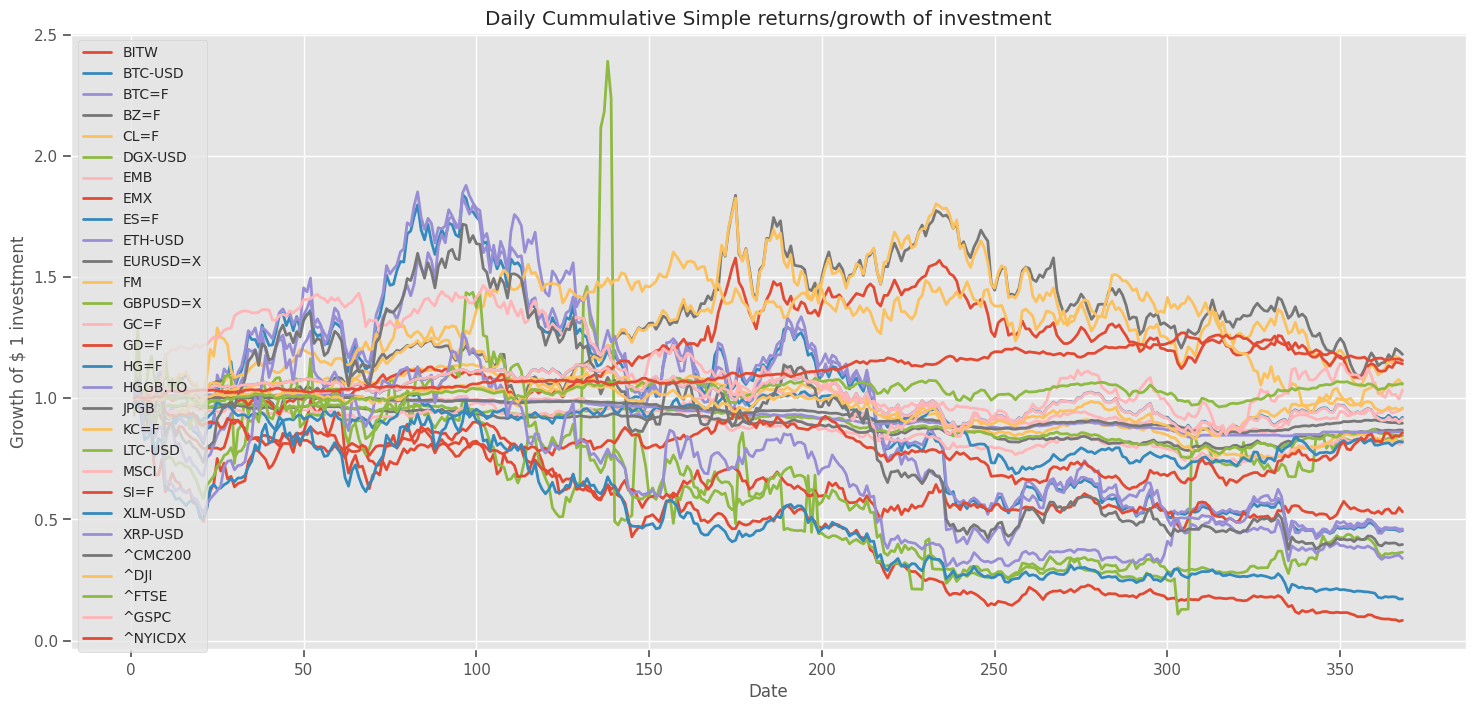

In [961]:
#visualize the daily cummulative simple return
print('Cummulative Returns')
fig, ax = plt.subplots(figsize=(18,8))

for i in daily_cummulative_simple_return.columns.values :
    ax.plot(daily_cummulative_simple_return[i], lw =2 ,label = i)

ax.legend( loc = 'upper left' , fontsize =10)
ax.set_title('Daily Cummulative Simple returns/growth of investment')
ax.set_xlabel('Date')
ax.set_ylabel('Growth of $ 1 investment')
plt.show(fig)

In [962]:
# Log of percentage change
cov_matrix = data.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,BITW,BTC-USD,BTC=F,BZ=F,CL=F,DGX-USD,EMB,EMX,ES=F,ETH-USD,EURUSD=X,FM,GBPUSD=X,GC=F,GD=F,HG=F,HGGB.TO,JPGB,KC=F,LTC-USD,MSCI,SI=F,XLM-USD,XRP-USD,^CMC200,^DJI,^FTSE,^GSPC,^NYICDX
BITW,0.002918,0.001403,0.001627,0.000116,0.000162,0.000372,1.212084e-04,0.000290,0.000280,0.001945,-1.197045e-06,0.000124,-1.181635e-05,0.000042,0.000123,0.000158,2.573967e-06,0.000029,0.000135,0.001782,3.679293e-04,0.000166,0.001591,1.650813e-03,0.001672,2.138590e-04,1.309254e-04,0.000277,-0.000072
BTC-USD,0.001403,0.001836,0.001640,0.000112,0.000143,0.000790,1.219755e-04,0.000347,0.000257,0.002062,7.943760e-06,0.000129,-6.640602e-06,0.000039,0.000107,0.000140,1.070384e-05,0.000031,0.000076,0.002021,3.623470e-04,0.000132,0.001777,1.854791e-03,0.001761,1.952936e-04,9.366829e-05,0.000259,-0.000064
BTC=F,0.001627,0.001640,0.001957,0.000111,0.000167,0.000630,1.187490e-04,0.000345,0.000273,0.001863,5.502061e-06,0.000145,-7.408860e-06,0.000043,0.000122,0.000164,9.301337e-06,0.000030,0.000138,0.001833,3.899599e-04,0.000160,0.001584,1.687772e-03,0.001761,2.064698e-04,1.032532e-04,0.000274,-0.000069
BZ=F,0.000116,0.000112,0.000111,0.000749,0.000733,0.000052,2.955547e-06,0.000221,0.000057,0.000124,-6.967672e-06,0.000029,8.075363e-06,0.000072,0.000421,0.000215,-7.043809e-06,0.000002,0.000165,0.000098,3.517888e-05,0.000167,0.000082,1.075488e-04,0.000103,5.721767e-05,6.554480e-05,0.000055,-0.000026
CL=F,0.000162,0.000143,0.000167,0.000733,0.000816,0.000122,4.019426e-06,0.000235,0.000066,0.000166,-8.256450e-06,0.000039,3.919433e-06,0.000071,0.000451,0.000221,-6.312758e-06,0.000001,0.000180,0.000100,5.375911e-05,0.000176,0.000107,1.187714e-04,0.000160,6.294544e-05,6.873566e-05,0.000065,-0.000023
DGX-USD,0.000372,0.000790,0.000630,0.000052,0.000122,0.029994,-2.571836e-06,0.000614,0.000007,0.000574,4.020962e-05,0.000015,1.226361e-05,-0.000026,0.000112,0.000414,-9.145910e-06,-0.000026,0.000002,0.000326,2.319700e-05,0.000075,0.001128,7.978214e-04,0.000513,5.052238e-05,3.770567e-05,0.000003,-0.000054
EMB,0.000121,0.000122,0.000119,0.000003,0.000004,-0.000003,6.848182e-05,0.000062,0.000069,0.000163,2.358663e-06,0.000032,6.498611e-07,0.000020,0.000006,0.000031,8.796250e-06,0.000012,0.000008,0.000140,1.156899e-04,0.000044,0.000126,1.192425e-04,0.000129,5.590073e-05,2.610478e-05,0.000070,-0.000021
EMX,0.000290,0.000347,0.000345,0.000221,0.000235,0.000614,6.219696e-05,0.000904,0.000117,0.000490,2.373186e-06,0.000069,1.152615e-05,0.000105,0.000153,0.000182,9.403824e-06,0.000007,0.000040,0.000455,1.890500e-04,0.000228,0.000363,3.950026e-04,0.000408,1.007652e-04,6.283736e-05,0.000120,-0.000055
ES=F,0.000280,0.000257,0.000273,0.000057,0.000066,0.000007,6.914978e-05,0.000117,0.000180,0.000347,-2.357183e-06,0.000067,-1.671566e-06,0.000007,0.000044,0.000057,7.138382e-06,0.000016,0.000026,0.000289,2.494354e-04,0.000050,0.000272,2.505626e-04,0.000286,1.448999e-04,5.270125e-05,0.000180,-0.000029
ETH-USD,0.001945,0.002062,0.001863,0.000124,0.000166,0.000574,1.628696e-04,0.000490,0.000347,0.003103,1.277995e-05,0.000166,-1.340764e-05,0.000058,0.000132,0.000197,1.656062e-05,0.000043,0.000131,0.002599,5.036938e-04,0.000168,0.002289,2.397818e-03,0.002217,2.631010e-04,1.431875e-04,0.000351,-0.000085


In [963]:
data = yf.download(y_symbols,startdate)['Adj Close']

[*********************100%***********************]  29 of 29 completed


In [964]:
print(data.head())

            BITW       BTC-USD    BTC=F       BZ=F       CL=F  DGX-USD  \
Date                                                                     
2018-01-01   NaN  13657.200195      NaN        NaN        NaN      NaN   
2018-01-02   NaN  14982.099609  14855.0  66.570000  60.369999      NaN   
2018-01-03   NaN  15201.000000  14975.0  67.839996  61.630001      NaN   
2018-01-04   NaN  15599.200195  14900.0  68.070000  62.009998      NaN   
2018-01-05   NaN  17429.500000  16590.0  67.620003  61.439999      NaN   

                  EMB   EMX     ES=F     ETH-USD  EURUSD=X         FM  \
Date                                                                    
2018-01-01        NaN   NaN      NaN  772.640991  1.200495        NaN   
2018-01-02  91.132271  0.89  2693.00  884.443970  1.201158  29.049549   
2018-01-03  91.093178  0.89  2711.00  962.719971  1.206345  29.445595   
2018-01-04  91.328026  0.89  2723.75  980.921997  1.201043  29.755550   
2018-01-05  91.382835  0.88  2742.50  997.7

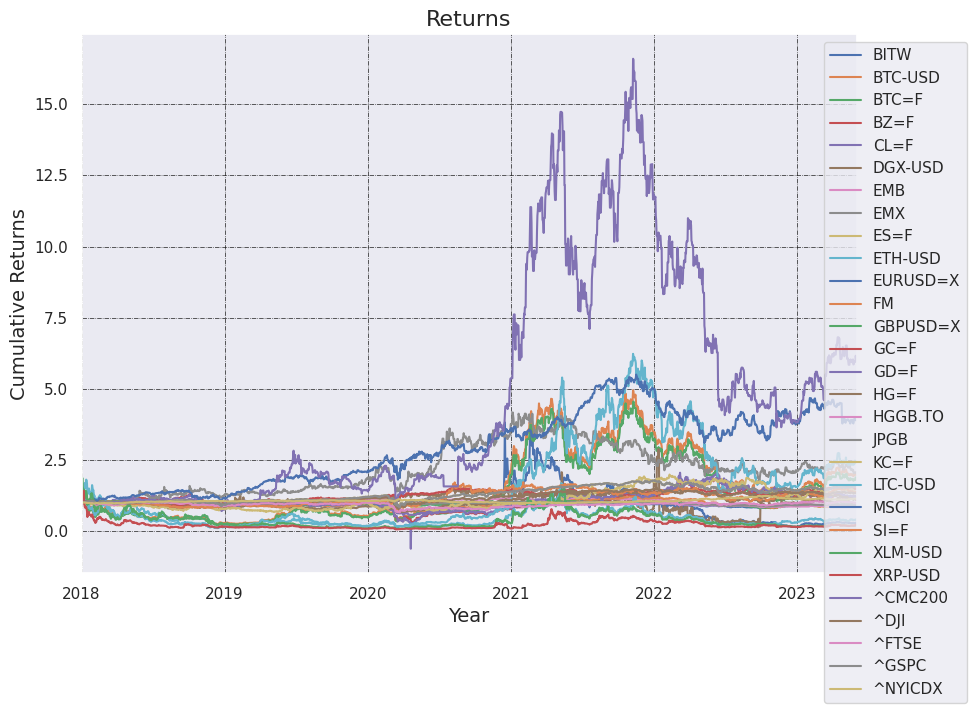

In [978]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper center')

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [966]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

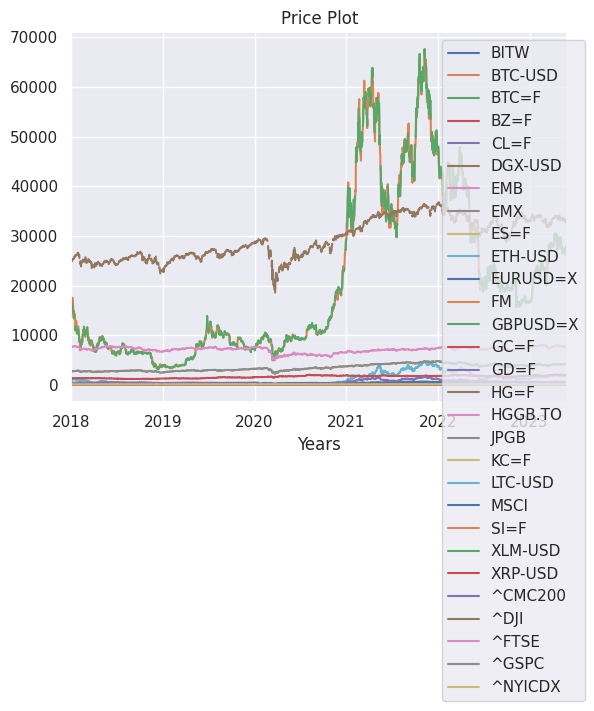

In [974]:

# Visualizing The Price of the stocks
# to set the plot size
#plt.figure(figsize=(24, 16), dpi=150)
  
# using .plot method to plot stock prices.
# we have passed colors as a list
data.plot(label='aapl')
plt.subplot
  
# adding title
plt.title('Price Plot')
  
# adding label to x-axis
plt.xlabel('Years')
  
# adding legend.
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper right')

AttributeError: ignored

In [ ]:
data